In [1]:
parameter_file = '../parameters/params.yaml'
import yaml
import sys
import pandas as pd
import os
from os.path import join, basename
import glob
import shutil
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.decomposition import TruncatedSVD
from scipy import sparse as sp

with open(parameter_file,'r') as f:
    doc = yaml.load(f)
    
    
samples = pd.read_csv("../parameters/samples.tsv", sep="\t", index_col=0)
samples
    
data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
#annotation=doc['annotation_gtf']
annotation=doc['annotation']

from Homer import *


os.chdir(doc["results"])
outdir = "tss_pca_csRNA_rna"
if not os.path.exists(outdir):
    os.mkdir(outdir)

/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:16: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  app.launch_new_instance()


In [2]:
from mplh.color_utils import get_colors


In [3]:
from scipy import stats

In [4]:
out_dir = "csRNA_pipeline/"
csRNA_dir = join(out_dir, 'csRNA_peaks')
tissues_csRNA_dir = join(out_dir,"csRNA_peaks_tissues")
merged_csRNA_dir = join(out_dir,'csRNA_peaks_tissues.merged')


homer_path =  "/data2/resources/software/homer/v4.11_10242019/bin/"
os.environ['PATH'] = f"{homer_path}:{os.environ['PATH']}"
!which homer

merged_f = join(merged_csRNA_dir, 'csRNA_peaks.tissues.merge')
peak_folder = tissues_csRNA_dir
anno_f = merged_f+".anno"
seq_f = anno_f + '.fa'
peaks_with_distance_f = join(merged_csRNA_dir,'peaks_with_tss_distances.tsv')
peaks_expression_f = merged_f + '.peaksexpression'

peaks_with_distance_size1_f = peaks_with_distance_f.replace('.tsv',"")+ "_size1.tsv"
peaks_with_distance_size1_bed_f = peaks_with_distance_size1_f.replace('.tsv',".bed")
peaks_with_distance_size1_noCDS_bed_f =peaks_with_distance_size1_bed_f.replace('.bed',"noCDS.bed")
# out_dir = join(main_dir, "peak_files")
# if not os.path.exists(out_dir):
#     os.mkdir(out_dir)



peaks_expression = pd.read_csv(peaks_expression_f,sep='\t', index_col=0)
peaks_expression.columns = map(lambda x: basename(x).split('.')[0], peaks_expression.columns)
peaks_expression_norm = peaks_expression/peaks_expression.sum(axis=0)
peaks_expression_norm_log2 = np.log2(peaks_expression_norm+1)
peaks_expression_norm_log2_z  = stats.zscore(peaks_expression_norm_log2,axis=1)

/data2/resources/software/homer/v4.11_10242019/bin//homer


In [5]:
color_map, name_map, p = get_colors(scheme='categorical', names=peaks_expression.columns, n_colors=len(peaks_expression.columns), use_white=False)
sns.set_palette(sns.color_palette(color_map.values()))

Generating palette: 100% |######################################| Time: 0:00:07


Text(14.825529513888888, 0.5, 'PC 4 12.66% Variance')

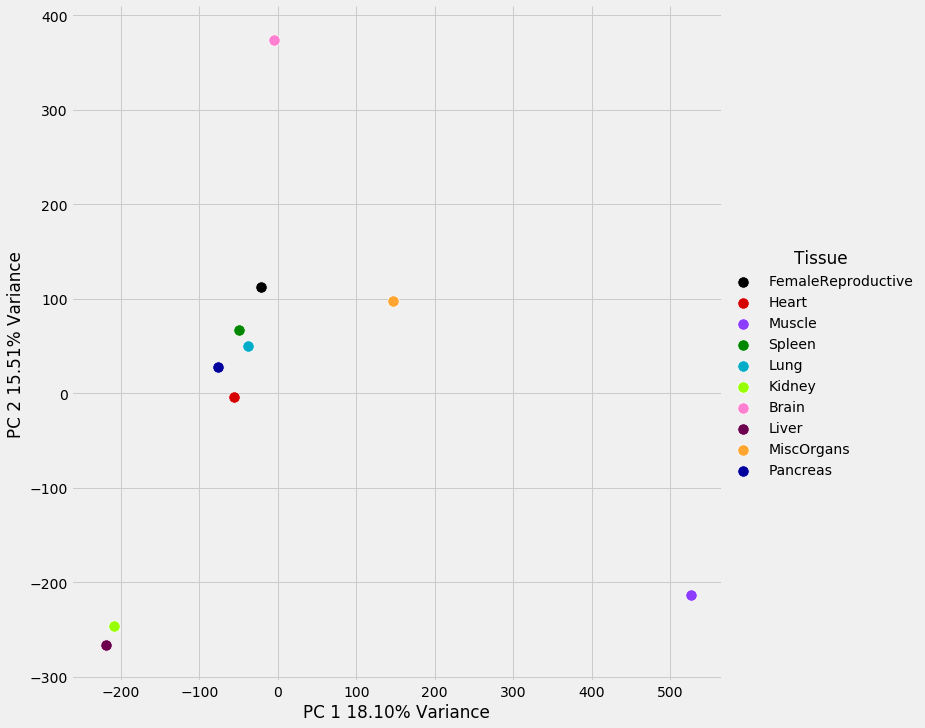

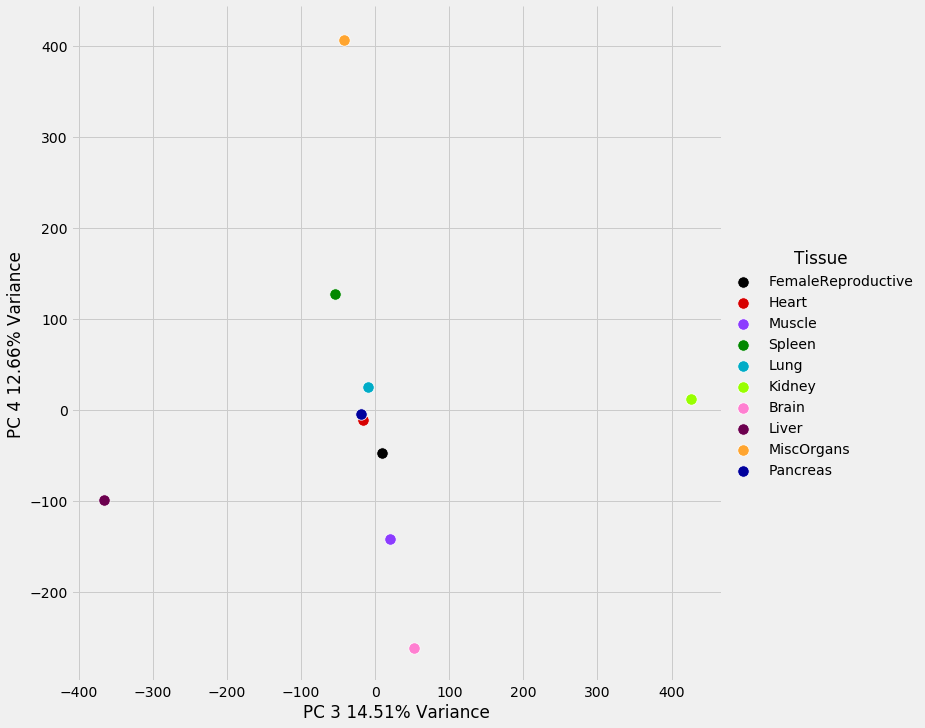

In [6]:
## Run with n=4 components
svd = TruncatedSVD(n_components=4)#peaks_expression_norm_log2_z.shape[1]-1) #4, n_iter=10)
svd.fit(peaks_expression_norm_log2_z.transpose())
### Plot first 2 axes
pc_axes_peak_by_motif = svd.transform(peaks_expression_norm_log2_z.transpose())

out_df = pd.DataFrame(pc_axes_peak_by_motif[:,:4])
out_df["Tissue"] = peaks_expression.columns

g = sns.pairplot(out_df,x_vars=[0], y_vars=[1], hue='Tissue', height=10,plot_kws={'s':130})

plt.xlabel(f"PC 1 {100*svd.explained_variance_ratio_[0]:.2f}% Variance")
plt.ylabel(f"PC 2 {100*svd.explained_variance_ratio_[1]:.2f}% Variance")


g = sns.pairplot(out_df,x_vars=[2], y_vars=[3], hue='Tissue', height=10,plot_kws={'s':130})
plt.xlabel(f"PC 3 {100*svd.explained_variance_ratio_[2]:.2f}% Variance")
plt.ylabel(f"PC 4 {100*svd.explained_variance_ratio_[3]:.2f}% Variance")

Text(0.5, 1, 'No normalization')

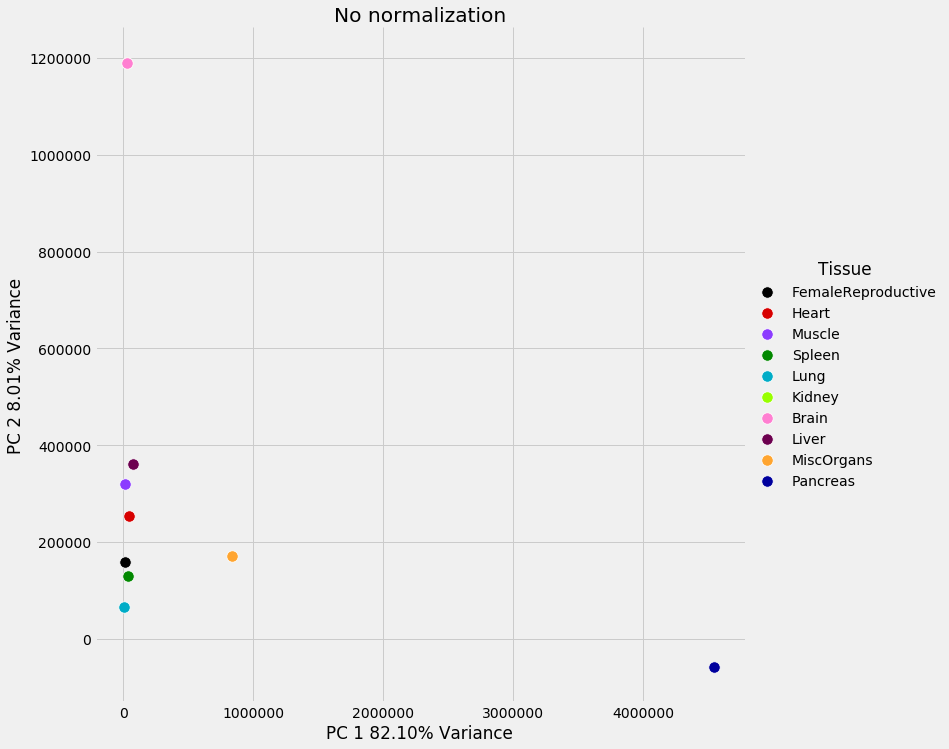

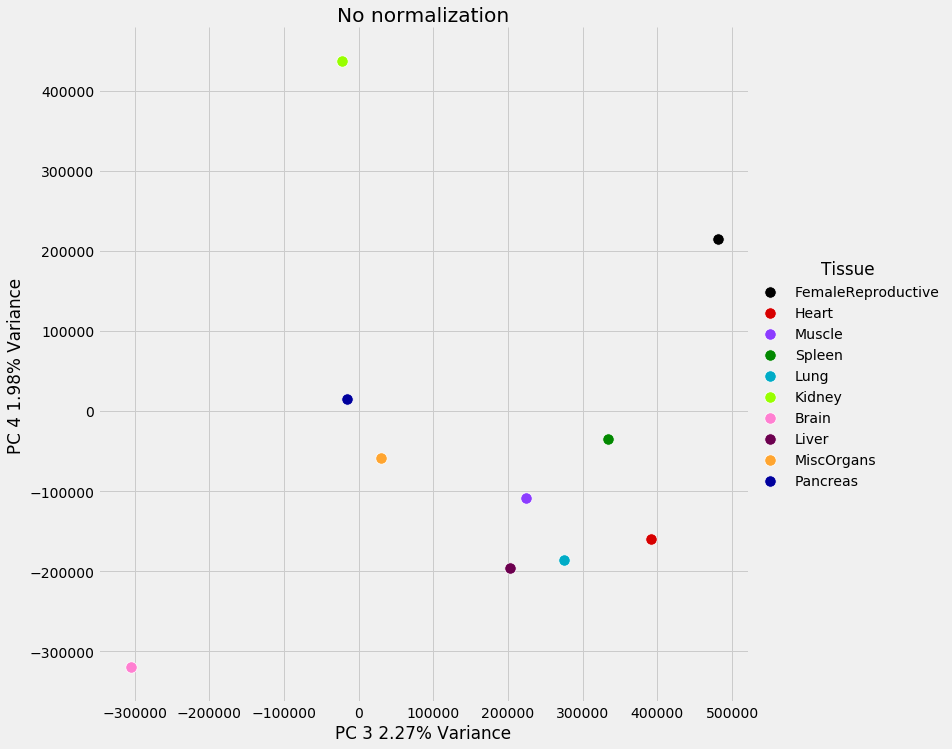

In [7]:
## Run with n=4 components
svd = TruncatedSVD(n_components=4)#peaks_expression.shape[1]-1) #4, n_iter=10)
svd.fit(peaks_expression.transpose())
### Plot first 2 axes
pc_axes_peak_by_motif = svd.transform(peaks_expression.transpose())

out_df = pd.DataFrame(pc_axes_peak_by_motif[:,:4])
out_df["Tissue"] = peaks_expression.columns

g = sns.pairplot(out_df,x_vars=[0], y_vars=[1], hue='Tissue', height=10,plot_kws={'s':130})

plt.xlabel(f"PC 1 {100*svd.explained_variance_ratio_[0]:.2f}% Variance")
plt.ylabel(f"PC 2 {100*svd.explained_variance_ratio_[1]:.2f}% Variance")

plt.title("No normalization")

g = sns.pairplot(out_df,x_vars=[2], y_vars=[3], hue='Tissue', height=10,plot_kws={'s':130})
plt.xlabel(f"PC 3 {100*svd.explained_variance_ratio_[2]:.2f}% Variance")
plt.ylabel(f"PC 4 {100*svd.explained_variance_ratio_[3]:.2f}% Variance")
plt.title("No normalization")

# Samples, not tissues (just csRNA with CHO)


Generating palette: 100% |######################################| Time: 0:00:23


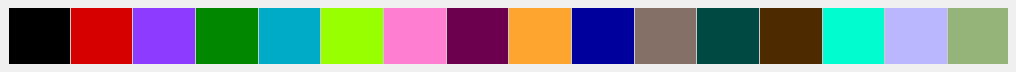

In [8]:
out_dir = "csRNA_pipeline/"
csRNA_dir = join(out_dir, 'csRNA_peaks')
samples_csRNA_dir = join(out_dir,"csRNA_peaks_samples")
merged_csRNA_dir = join(out_dir,'csRNA_peaks_samples.merged')


merged_f = join(merged_csRNA_dir, 'csRNA_peaks.samples.merge')
peak_folder = samples_csRNA_dir
anno_f = merged_f+".anno"
seq_f = anno_f + '.fa'
peaks_with_distance_f = join(merged_csRNA_dir,'peaks_with_tss_distances.tsv')
peaks_expression_f = merged_f + '.peaksexpression'

peaks_with_distance_size1_f = peaks_with_distance_f.replace('.tsv',"")+ "_size1.tsv"
peaks_with_distance_size1_bed_f = peaks_with_distance_size1_f.replace('.tsv',".bed")
peaks_with_distance_size1_noCDS_bed_f =peaks_with_distance_size1_bed_f.replace('.bed',"noCDS.bed")


peaks_expression = pd.read_csv(peaks_expression_f,sep='\t', index_col=0)
peaks_expression.columns = map(lambda x: basename(x).split('.')[0], peaks_expression.columns)
peaks_expression_norm = peaks_expression/peaks_expression.sum(axis=0)
peaks_expression_norm_log2 = np.log2(peaks_expression_norm+1)
peaks_expression_norm_log2_z  = stats.zscore(peaks_expression_norm_log2,axis=1)

#map(peaks_expression.columns
tis_map = {}
for i in peaks_expression.columns:
    for j in samples["Tissue"].unique():
        if j in i:
            if i in tis_map:
                print("Already here!", i)
            else:
                tis_map[i] = j
color_map, name_map, p = get_colors(scheme='categorical', names=samples["Tissue"].unique(), n_colors=len(peaks_expression.columns), use_white=False)
sns.set_palette(sns.color_palette(color_map.values()))


current_palette = sns.color_palette()
sns.palplot(current_palette)

In [9]:
def run_pca(expr_df,samples_to_drop=None, f_save=None, top_var = 0, out_f=None, label=None):
    if samples_to_drop is not None:
        expr_df = expr_df.drop(samples_to_drop)
    #Remove any 0s across all samples
    expr_df = expr_df[~((expr_df==0).all(axis=1))]

    peaks_expression_norm_log2_z = stats.zscore(expr_df,axis=1)
    print(peaks_expression_norm_log2_z.shape)
    ## Run with n=4 components
    svd = TruncatedSVD(n_components=4)#peaks_expression_norm_log2_z.shape[1]-1) #4, n_iter=10)
    svd.fit(peaks_expression_norm_log2_z.transpose())
    ### Plot first 2 axes
    pc_axes_peak_by_motif = svd.transform(peaks_expression_norm_log2_z.transpose())

    out_df = pd.DataFrame(pc_axes_peak_by_motif[:,:4], index = expr_df.columns.values, 
                          columns=map(lambda x: f"PC {x}",np.arange(1,5)))
    out_df["Tissue"] = out_df.index.map(tis_map)
    fig, ax = plt.subplots(1, figsize=(10,10))
    sns.scatterplot("PC 1", "PC 2",data=out_df, hue='Tissue', x_jitter=False ,
                    s=130,ax=ax)#,plot_kws={'s':130}, ax=ax)
    plt.xlabel(f"PC 1 {100*svd.explained_variance_ratio_[0]:.2f}% Variance")
    plt.ylabel(f"PC 2 {100*svd.explained_variance_ratio_[1]:.2f}% Variance")
    if label is not None:
        plt.title(label)
        
    if out_f is not None:
        helper_save(out_f+ "_pc_1_2")
        out_df.to_csv(out_f + '.csv')

    fig, ax = plt.subplots(1, figsize=(10,10))
    sns.scatterplot("PC 3", "PC 4",data=out_df, hue='Tissue', x_jitter=False ,
                    s=130,ax=ax)#,plot_kws={'s':130}, ax=ax)
    plt.xlabel(f"PC 3 {100*svd.explained_variance_ratio_[2]:.2f}% Variance")
    plt.ylabel(f"PC 4 {100*svd.explained_variance_ratio_[3]:.2f}% Variance")
    if label is not None:
        plt.title(label)
    if out_f is not None:
        helper_save(out_f+ "_pc_3_4")
    return

## Top variable peaks only

## Using top 3000 variable peaks

(223560, 30)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


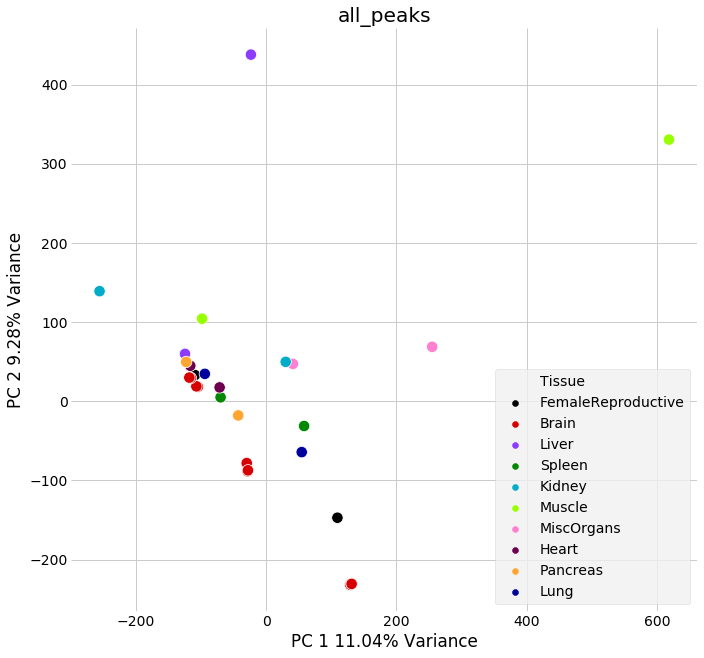

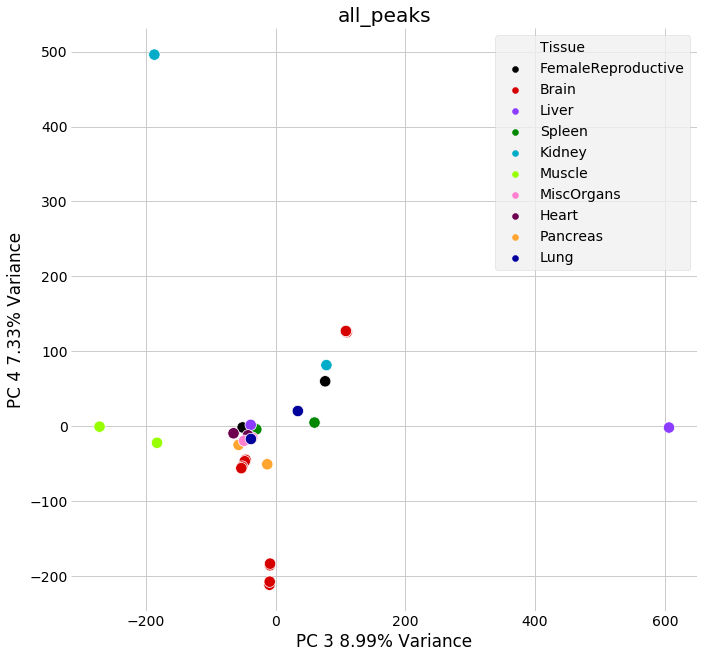

In [10]:
curr_f = f"csRNA_samples_peaks_log2"
curr_f = join(outdir, curr_f)
run_pca(peaks_expression_norm_log2,out_f=curr_f, label=f"all_peaks")


(30000, 30)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(3000, 30)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(300, 30)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


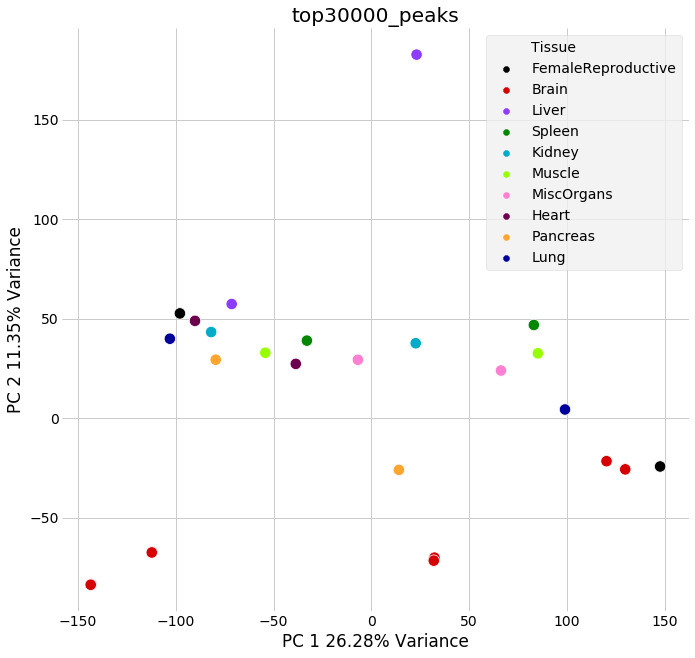

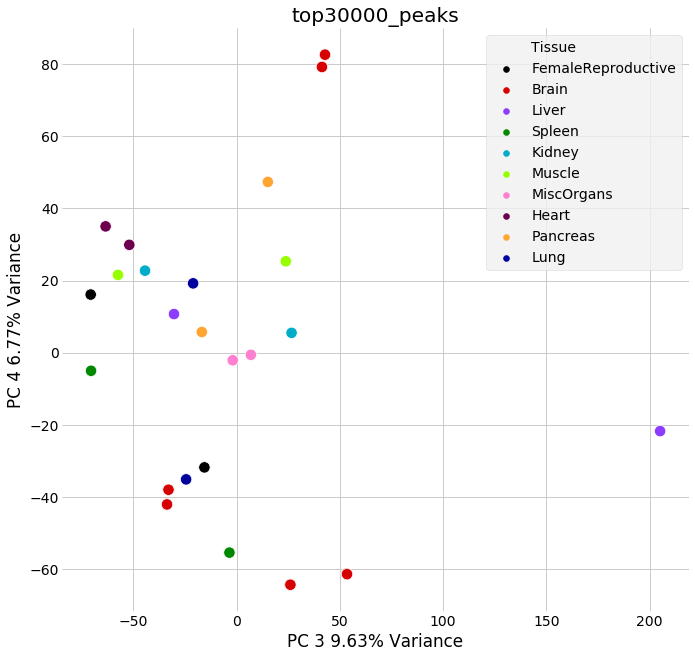

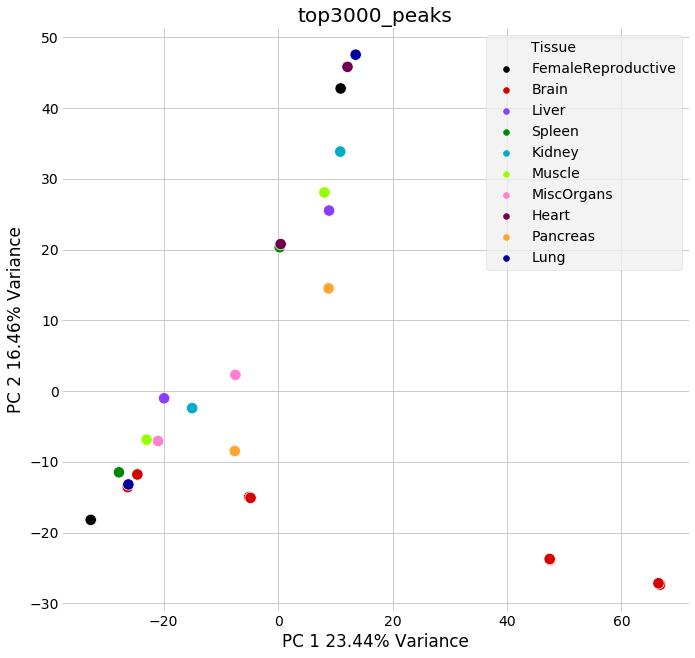

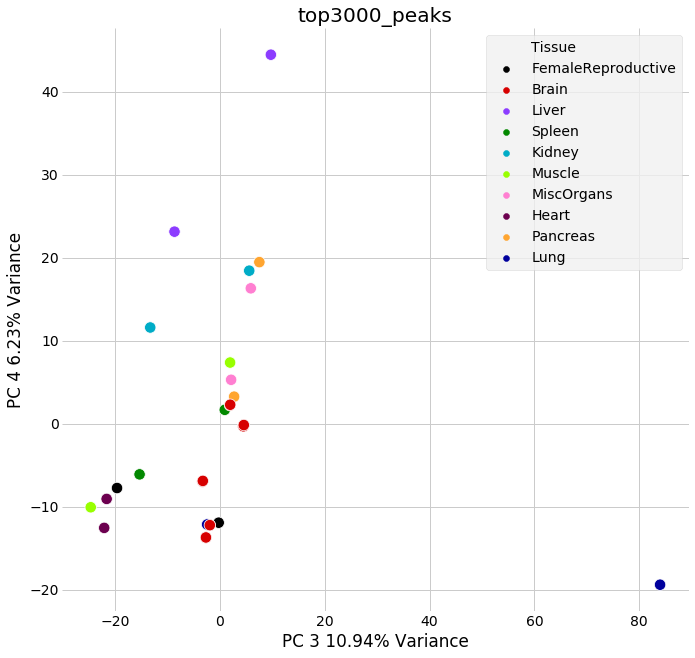

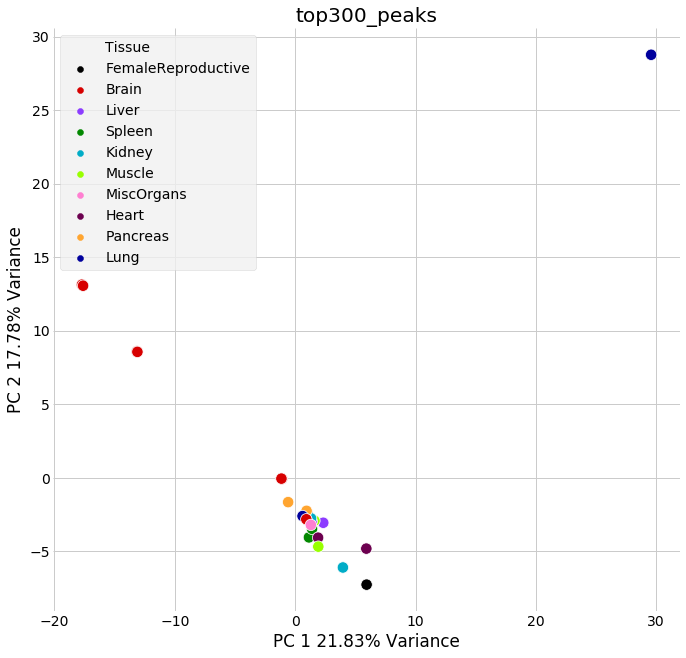

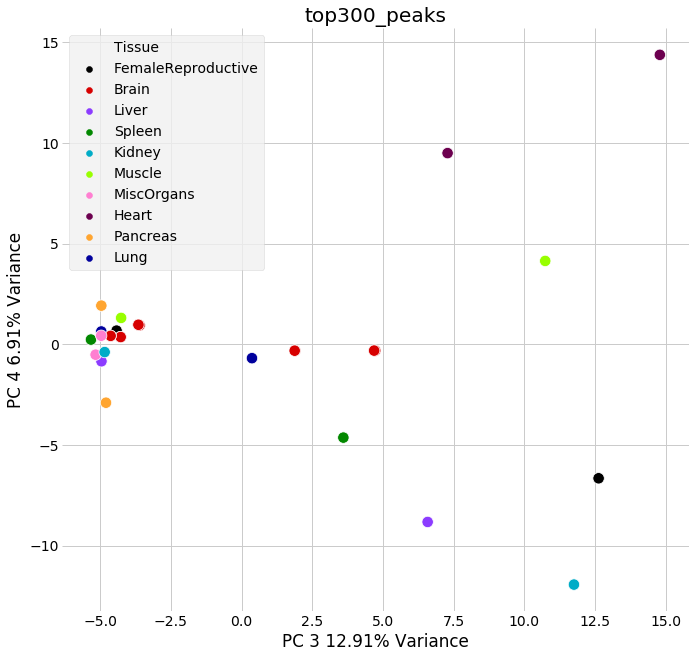

In [11]:
top_vars=30000
inds_to_keep = peaks_expression_norm_log2.var(axis=1).sort_values(ascending=False).index[:top_vars]
curr_f = f"csRNA_samples_top{top_vars}_peaks_log2"
curr_f = join(outdir, curr_f)
run_pca(peaks_expression_norm_log2.loc[inds_to_keep],out_f=curr_f, label=f"top{top_vars}_peaks")

top_vars=3000
curr_f = f"csRNA_samples_top{top_vars}_peaks_log2"
curr_f = join(outdir, curr_f)
inds_to_keep = peaks_expression_norm_log2.var(axis=1).sort_values(ascending=False).index[:top_vars]
run_pca(peaks_expression_norm_log2.loc[inds_to_keep],out_f=curr_f, label=f"top{top_vars}_peaks")

top_vars=300
curr_f = f"csRNA_samples_top{top_vars}_peaks_log2"
curr_f = join(outdir, curr_f)
inds_to_keep = peaks_expression_norm_log2.var(axis=1).sort_values(ascending=False).index[:top_vars]
run_pca(peaks_expression_norm_log2.loc[inds_to_keep],out_f=curr_f, label=f"top{top_vars}_peaks")
